In [59]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer



In [388]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [390]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [392]:
#df = df.dropna()

In [394]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [396]:
df.dtypes

Survived      int64
Age         float64
Fare        float64
dtype: object

In [398]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [400]:
x = df.iloc[:,1:]
y= df.iloc[:,0]

In [402]:
x.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [404]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [406]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state=42)

/var/folders/gg/zmzzc3ks1lndnw2n_96m028w0000gn/T/ipykernel_84452/2398450126.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


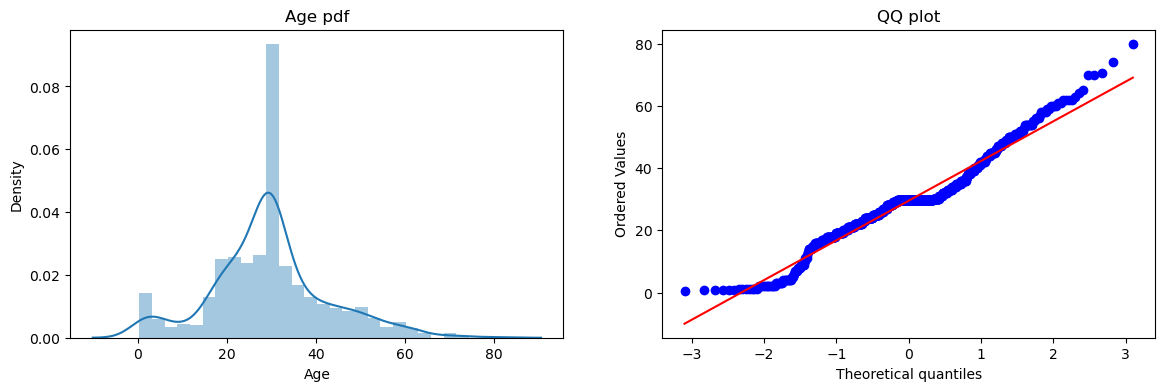

In [408]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age pdf')

plt.subplot(122)
stats.probplot(X_train['Age'], dist ='norm',plot = plt)
plt.title('QQ plot')

plt.show()

/var/folders/gg/zmzzc3ks1lndnw2n_96m028w0000gn/T/ipykernel_84452/2505633812.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


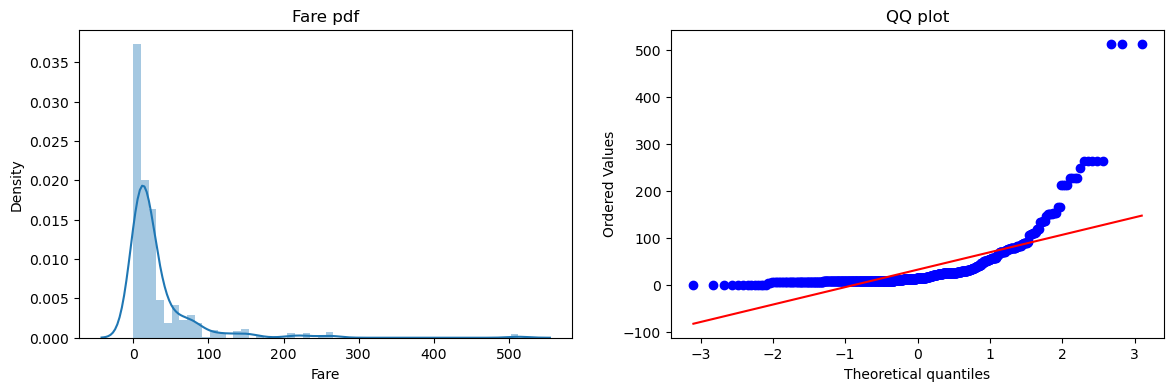

In [192]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare pdf')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist ='norm',plot = plt)
plt.title('QQ plot')

plt.show()

In [194]:
m1 = LogisticRegression()
m2 = DecisionTreeClassifier()

In [196]:
m1.fit(X_train,y_train)
m2.fit(X_train,y_train)

DecisionTreeClassifier()

In [198]:
y1_pred= m1.predict(X_test)

In [200]:
y2_pred= m2.predict(X_test)

In [202]:
accuracy_score(y_test,y1_pred)

0.6480446927374302

In [204]:
accuracy_score(y_test,y2_pred)

0.6815642458100558

In [206]:
ftr = FunctionTransformer(func = np.log1p)

In [208]:
X_train_transformed = ftr.fit_transform(X_train)

In [210]:
X_test_transformed = ftr.transform(X_test)

In [212]:
m1.fit(X_train_transformed,y_train)
m2.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [214]:
y1_pred= m1.predict(X_test_transformed)

In [216]:
y2_pred = m2.predict(X_test_transformed)

In [218]:
accuracy_score(y_test,y1_pred)

0.6815642458100558

In [220]:
accuracy_score(y_test, y2_pred)

0.6703910614525139

In [222]:
X_transformed = ftr.fit_transform(x)

In [224]:
print('lr',np.mean(cross_val_score(m1,X_transformed,y,scoring ='accuracy', cv=10)))
print('dt',np.mean(cross_val_score(m2,X_transformed,y,scoring ='accuracy', cv=10)))

lr 0.678027465667915
dt 0.6577652933832709


Text(0.5, 1.0, 'a QQ plot')

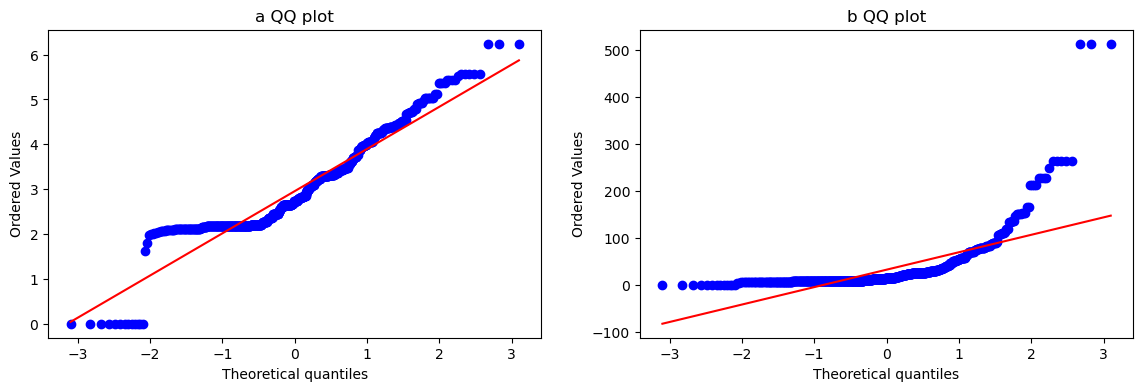

In [226]:
plt.figure(figsize=(14,4))
plt.subplot(122)
stats.probplot(X_train['Fare'], dist ='norm',plot = plt)
plt.title('b QQ plot')

plt.subplot(121)
stats.probplot(X_train_transformed['Fare'], dist ='norm',plot = plt)
plt.title('a QQ plot')

Text(0.5, 1.0, 'a QQ plot')

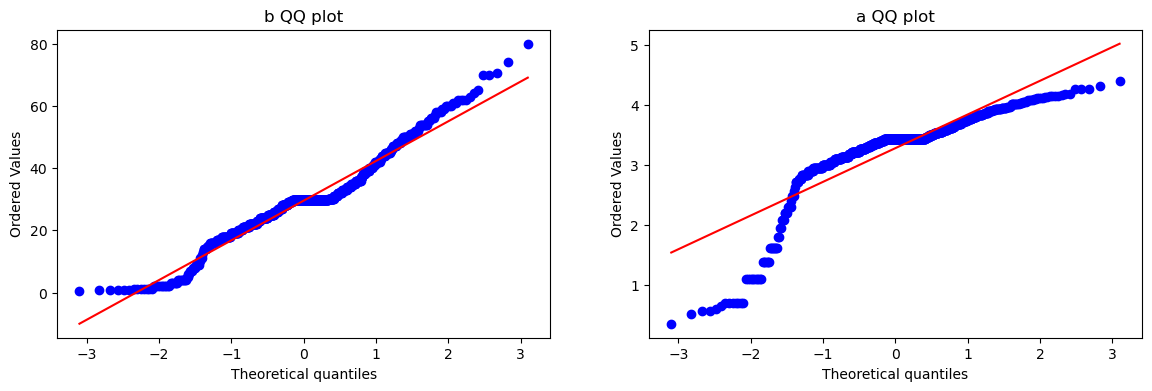

In [228]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'], dist ='norm',plot = plt)
plt.title('b QQ plot')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist ='norm',plot = plt)
plt.title('a QQ plot')

In [230]:
trf = ColumnTransformer([('Log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

In [242]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [244]:
m1.fit(X_train_transformed,y_train)

LogisticRegression()

In [246]:
m2.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [248]:
y1_pred  = m1.predict(X_test_transformed)

In [250]:
y2_pred  = m2.predict(X_test_transformed)

In [252]:
accuracy_score(y_test,y1_pred)

0.6703910614525139

In [254]:
accuracy_score(y_test,y2_pred)

0.6759776536312849

In [258]:
X_trans2 = trf.fit_transform(x)

In [260]:
print('lr',np.mean(cross_val_score(m1,X_trans2,y,scoring ='accuracy', cv=10)))
print('dt',np.mean(cross_val_score(m2,X_trans2,y,scoring ='accuracy', cv=10)))

lr 0.6712609238451936
dt 0.6610986267166042


In [266]:
def sqr(x):
    print(x)
sqr(lambda x : x**2)

<function <lambda> at 0x17c992840>


/var/folders/gg/zmzzc3ks1lndnw2n_96m028w0000gn/T/ipykernel_84452/2613220765.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_trans2['Age'])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


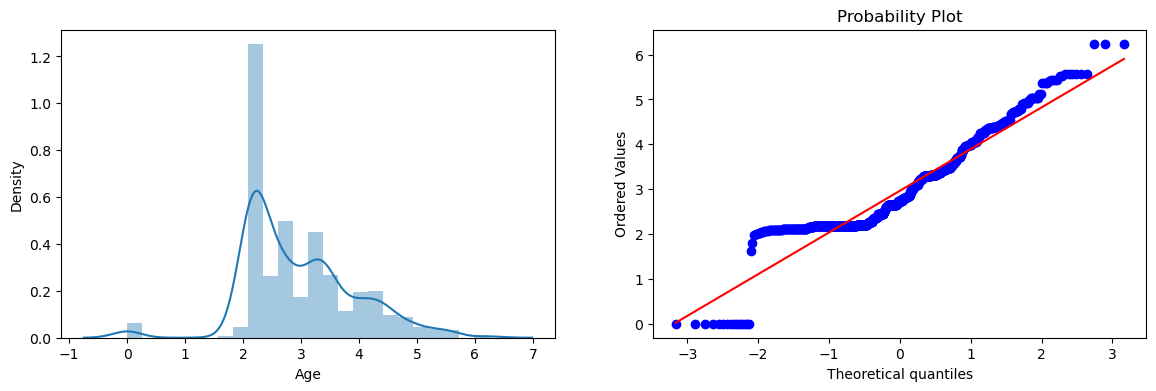

In [310]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot(X_trans2['Age'])

plt.subplot(122)
stats.probplot(X_trans2['Age'], dist ='norm',plot = plt)



plt.show()

/var/folders/gg/zmzzc3ks1lndnw2n_96m028w0000gn/T/ipykernel_84452/4288492351.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_trans2['Fare'])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


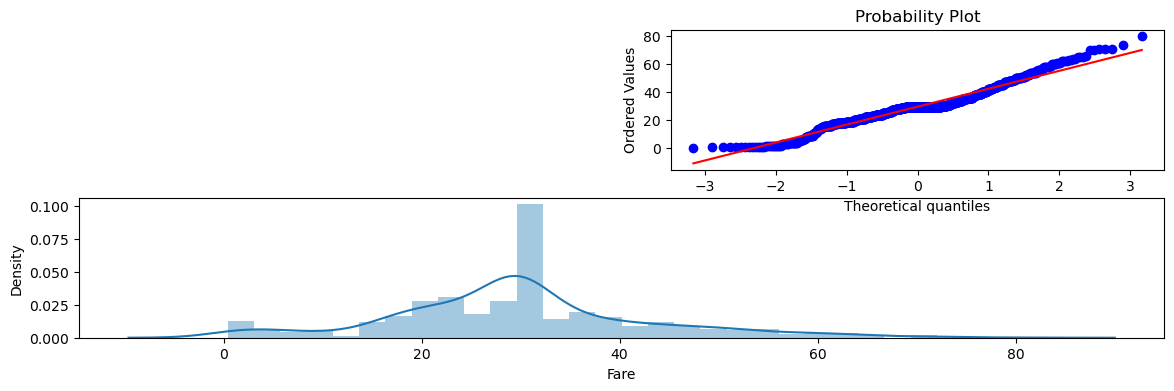

In [314]:
plt.figure(figsize=(14,4))
plt.subplot(212)
sns.distplot(X_trans2['Fare'])

plt.subplot(222)
stats.probplot(X_trans2['Fare'], dist ='norm',plot = plt)

plt.show()

In [274]:
X_trans2 = pd.DataFrame(X_trans2, columns= X_train.columns)

In [276]:
X_trans2

,Age,Fare
0,2.110213,22.000000
1,4.280593,38.000000
2,2.188856,26.000000
3,3.990834,35.000000
4,2.202765,35.000000
...,...,...
886,2.639057,27.000000
887,3.433987,19.000000
888,3.196630,29.699118
889,3.433987,26.000000
